In [17]:
# importing necessary packages

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [18]:
# reading the data

url = 'https://raw.githubusercontent.com/tranghth-lux/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt'

data = pd.read_csv(url, header=0)

In [19]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [21]:
data.shape

(14999, 10)

In [22]:
# from above data we can check that we have two object columns "sales" and "salary". sales represent the department of the employee and
# salary is grouped into low, medium & high

In [23]:
# checking the unique values of object columns

print(data["sales"].unique())

print("\n",data['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']

 ['low' 'medium' 'high']


In [24]:
# There are 10 departments in our data let's explore RandD department further

data[data['sales'] == 'RandD'].shape

(787, 10)

In [25]:
# we have 787 rows for which deparment is RandD which is around 5 % of the data

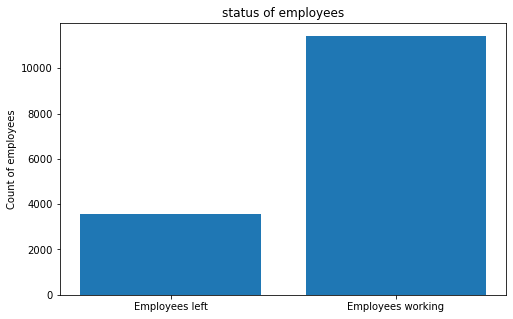

In [26]:
employees_left = data[data["left"] == 1]['left'].shape[0]

employees_working = data[data["left"] == 0]['left'].shape[0]

fig = plt.figure(figsize= (8,5))

plt.bar(['Employees left', 'Employees working'], [employees_left, employees_working])

plt.ylabel('Count of employees')

plt.title("status of employees")

plt.show()

In [27]:
le = LabelEncoder()

le.fit(data['sales'].unique())

data['sales'] = le.transform(data['sales'])

le.fit(data['salary'].unique())

data['salary'] = le.transform(data['salary'])

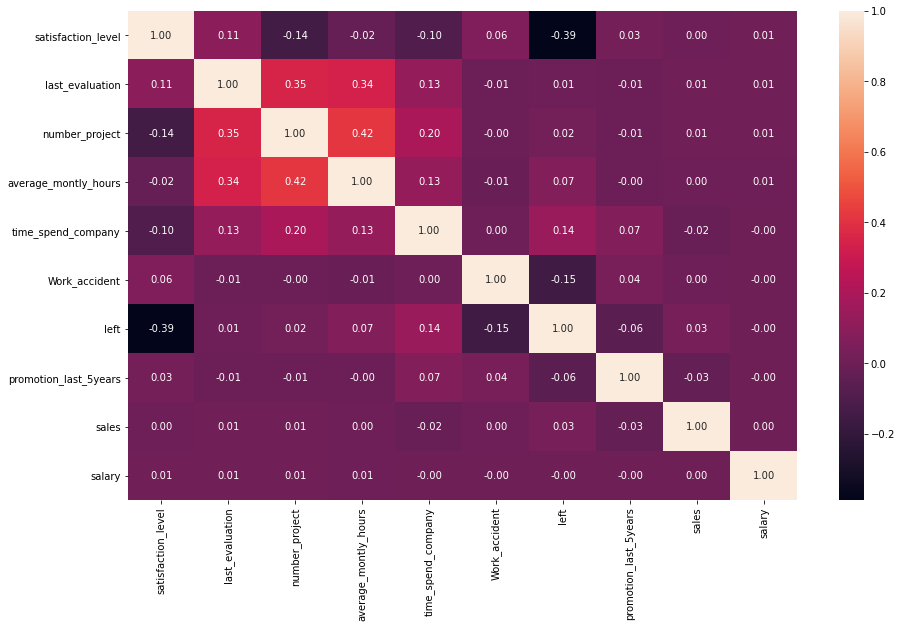

In [28]:
# Building correlation matrix

corr = data.corr()

fig = plt.figure(figsize=(15,9))

sns.heatmap(corr, annot=True, fmt='.2f')

plt.show()

In [29]:
# Rankings of the feature based on their correlation with left(what we want to predict)

corr.abs()['left'].sort_values(ascending=False)

left                     1.000000
satisfaction_level       0.388375
Work_accident            0.154622
time_spend_company       0.144822
average_montly_hours     0.071287
promotion_last_5years    0.061788
sales                    0.032105
number_project           0.023787
last_evaluation          0.006567
salary                   0.001294
Name: left, dtype: float64

In [30]:
# here satisfaction level is only feature that is correlated with target variable left

In [34]:
# separating input & target variables

X = data.drop('left', axis=1)

y = data['left']

C:\Users\manis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\manis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Optimal number of features: 3
Selected features: ['satisfaction_level', 'Work_accident', 'promotion_last_5years']


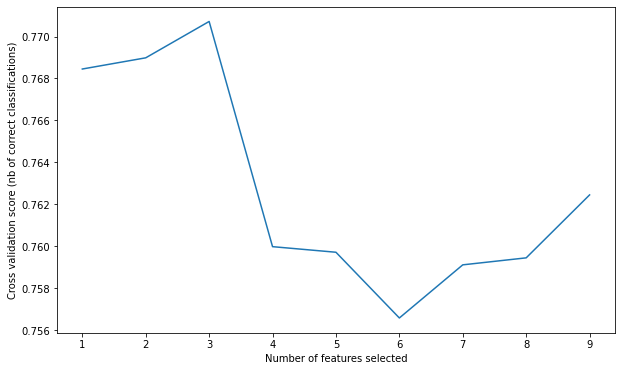

In [36]:
from sklearn.feature_selection import RFECV

from sklearn.linear_model import LogisticRegression

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [38]:
# Model evaluation based on simple train/test split using train_test_split() function

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 

from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

y_pred_probab = lr.predict_proba(X_test)[:, 1]

[fpr, tpr, thr] = roc_curve(y_test, y_pred_probab)

print('Train/Test split results:')

print(lr.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))

print(lr.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_probab))

print(lr.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
LogisticRegression accuracy is 0.757
LogisticRegression log_loss is 0.463
LogisticRegression auc is 0.789


C:\Users\manis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
